# Applied Machine Learning with Scikit Learn

### Libraries

- [scikit-learn](http://scikit-learn.org/stable/)
- pandas
- matplotlib

In this exercise we will learn how to use scikit-learn to train linear regression, K-NN and logistic regression models.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
# from sklearn.preprocessing import OneHotEncoder
# from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, auc, roc_curve
# import seaborn as sns
%matplotlib inline

# Linear Regression: Predicting sales from ads expense

<img src="img/ada_ads.jpg" width="300">

Let's import the dataset:

In [6]:
data = pd.read_csv('data/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of units)

In [7]:
data.shape

(200, 4)

Visualize the relationship between the features and the response

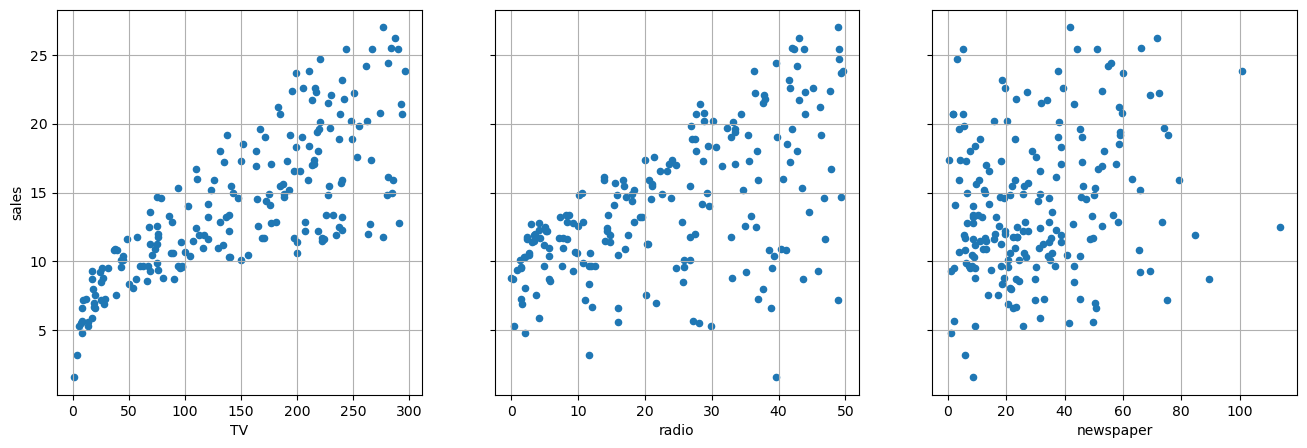

In [10]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 5), grid=True)
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1], grid=True)
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2], grid=True)
plt.show()

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

<img src="img/estimating_coefficients.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction:

<img src="img/slope_intercept.png">

## Hands on!
Let's create the feature matrix and the class vector (X and y):

In [11]:
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

X.describe()

,TV,radio,newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


**Scikit-learn** provides an easy way to train the model:

In [12]:
lin_reg = LinearRegression()  # create the model
lin_reg.fit(X, y)  # train it

LinearRegression()

Back to the theory! Let's see what the formula looks like:

In [13]:
for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(lin_reg.coef_[f], feature_cols[f]))
print(lin_reg.intercept_)

0.04576464545539761 * TV + 
0.18853001691820462 * radio + 
-0.0010374930424763159 * newspaper + 
2.9388893694594067




$$y = \beta_0 + \beta_1  \times TV + \beta_2  \times radio + \beta_3  \times newspaper$$
$$y = 2.938 + 0.045 \times TV + 0.18  \times radio + -0.001  \times newspaper$$

Let's plot the predictions and the original values:

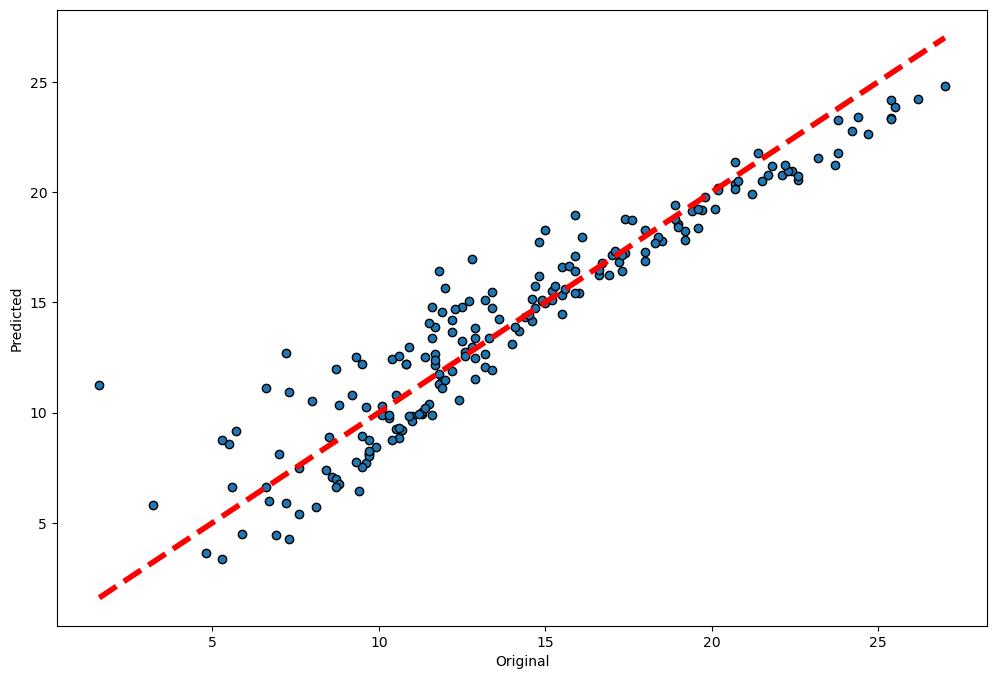

In [14]:
lr = LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=5)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

Cross validation? What is that?
https://en.wikipedia.org/wiki/Cross-validation_(statistics)

Print the MSE:

In [15]:
mean_squared_error(y, predicted)

3.0729465971002106

## Regularization

In our dataset, we have only 3 features, but 200 records, which is enough for learning a good linear model. But what if we had much fewer records, say, 5?

In [16]:
X = X[:5]
y = y[:5]

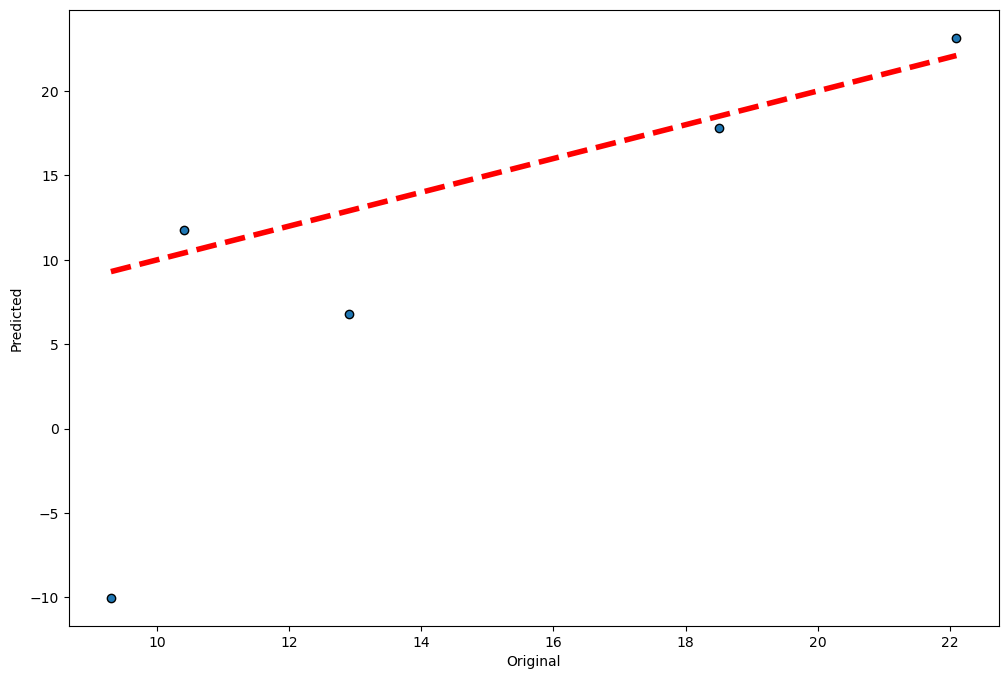

In [17]:
lr = LinearRegression()

predicted = cross_val_predict(lr, X, y, cv=5)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

In [18]:
mean_squared_error(y, predicted)

82.77419262404129

**Problem**: The model remembers the training records (overfitting).

**Solution**: Regularization

Regularization refers to methods that help to reduce overfitting. Let's try Ridge Regression, which puts a penalty on large weights $\beta_i$ and forces them to be smaller in magnitude. This reduces the complexity of the model.

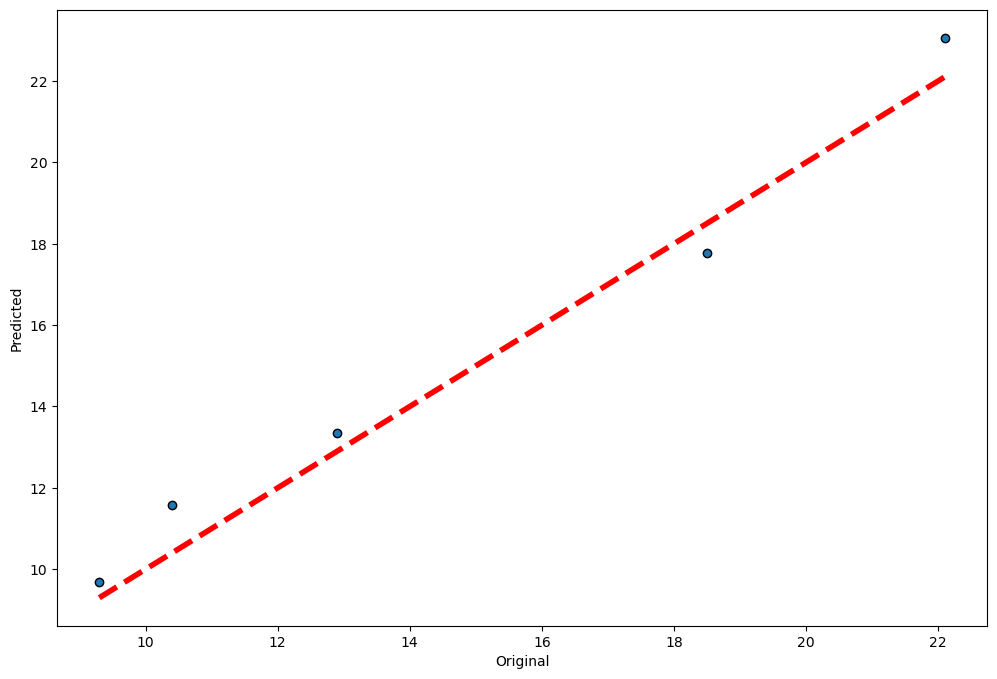

In [20]:
ridge = Ridge(alpha=6)

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted_r = cross_val_predict(ridge, X, y, cv=5)

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y, predicted_r, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

In [21]:
mean_squared_error(y, predicted_r)

0.6442462580572467

-------
# Predicting Titanic survival with Logistic Regression

Let's use the data obtained by the _Encyclopedia Titanica_ to predict if a passenger survived the Titanic disaster.

<img src="img/titanic.jpg" width="600">

Let's import the dataset:

In [24]:
titanic = pd.read_excel('data/titanic.xls')
titanic.head(5)

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


What are the **features**?
- name: Name of the passenger
- sex: Male or Female
- age: Age in years
- sibsp: # of siblings / spouses aboard the Titanic
- parch: # of parents / children aboard the Titanic
- ticket: Ticket number
- fare: Ticket price
- cabin: Cabin number
- embarked: Port of Embarkation

What is the **response**?
- survived: whether the passenger survived the disaster or not

In [25]:
dead = titanic[titanic['survived']==0]
survived = titanic[titanic['survived']==1]

print("Survived {0}, Dead {1}".format(len(survived), len(dead)))
print("Survived {:.2%}".format(len(survived)/len(titanic)))

Survived 500, Dead 809
Survived 38.20%


Specify the columns to use as features:

In [26]:
titanic_features = ['sex', 'age', 'sibsp', 'parch', 'fare']

For the sake of this execise, we can assume the other features (name, cabin number, embarked) are not predictive.

### Let's prepare the feature vector for the training

The dataset contains one categorical variable: sex (male|female)

We need to convert it to a numerical variable. Pandas offers the method *get_dummies* that takes care of this:

In [27]:
# The features vector
X = pd.get_dummies(titanic[titanic_features])
X.head()

,age,sibsp,parch,fare,sex_female,sex_male
0,29.0000,0,0,211.3375,True,False
1,0.9167,1,2,151.5500,False,True
2,2.0000,1,2,151.5500,True,False
3,30.0000,1,2,151.5500,False,True
4,25.0000,1,2,151.5500,True,False


The categorical feature _sex_ is converted in 2 boolean features.

Titanic sank in 1912: it was a lot of time ago! Some data may be missing. Let's check if there are undefined values.

In [28]:
len(X[X.isna().any(axis=1)])

264

Let's try to fix the data with a basic imputation method: replacing the missing values with the mean.

More info: https://en.wikipedia.org/wiki/Imputation_(statistics)

In [29]:
X = X.fillna(X.mean())

len(X[X.isna().any(axis=1)])

0

The label used for the traning:

In [30]:
y = titanic['survived']

Let's train the model ...

In [31]:
logistic = LogisticRegression(solver='lbfgs')

... and evaluate the precison/recall with a cross validation (10 splits).

In [32]:
precision = cross_val_score(logistic, X, y, cv=10, scoring="precision")
recall = cross_val_score(logistic, X, y, cv=10, scoring="recall")

# Precision: avoid false positives
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
# Recall: avoid false negatives
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))

Precision: 0.72 (+/- 0.13)
Recall: 0.68 (+/- 0.16)


Logistic regression uses a threshold on the probability to decide at which class to assign a prediction. In some cases, we are interested to understand how the model behaves at different levels of this threshold.

Let's give a look at the ROC curve!
https://en.wikipedia.org/wiki/Receiver_operating_characteristic

In [33]:
# Predict the probabilities with a cross validationn
y_pred = cross_val_predict(logistic, X, y, cv=10, method="predict_proba")
# Compute the False Positive Rate and True Positive Rate
fpr, tpr, _ = roc_curve(y, y_pred[:, 1])
# Compute the area under the fpt-tpf curve
auc_score = auc(fpr, tpr)

... and plot the result:

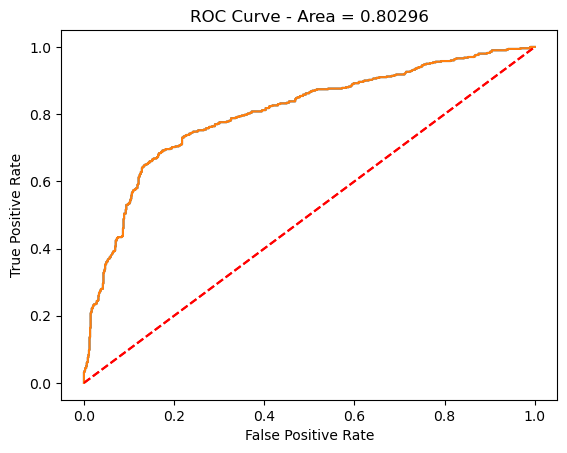

In [35]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Area = {:.5f}".format(auc_score))
plt.show()

### Explore the model output

Let's train on the full dataset:

In [36]:
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(X.values, y)

LogisticRegression()

Of course, since we trained the whole dataset, we don't have new samples to predict, but we can predict the outcome and the relative probability for some artificial samples. Would you have survived?

Remember the features:

In [28]:
X.columns

Index(['age', 'sibsp', 'parch', 'fare', 'sex_female', 'sex_male'], dtype='object')

Would a man, 25 years old without relative onboard, and with a fare of 100 survive?

In [37]:
test = [25, 0, 0, 100, 0, 1]
print(logistic.predict([test])[0])

0


What is the probability distribution behind this prediction?

In [38]:
logistic.predict_proba([test])

array([[0.55286211, 0.44713789]])

What about a woman, 35 years old, alone onboard and with the same fare?

In [42]:
test = [35, 0, 0, 100, 1, 0]
print(logistic.predict([test])[0] > 0)
print(logistic.predict_proba([test])[0])

True
[0.11464308 0.88535692]


---------

# Overview on K-NN

Let's create some complex shapes to observe how K-NN behaves.

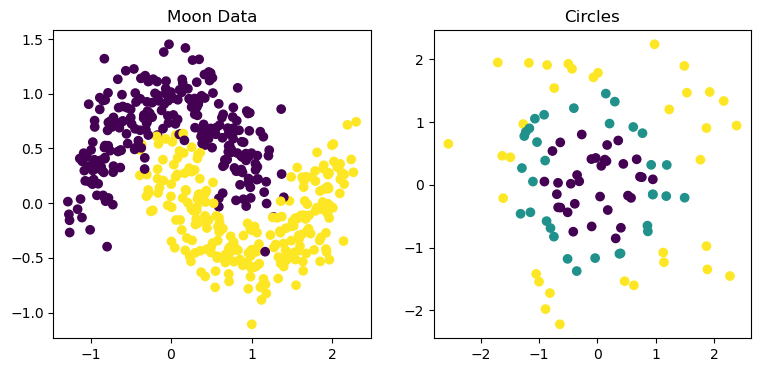

In [45]:
from sklearn.datasets import make_moons, make_gaussian_quantiles
from sklearn.model_selection import train_test_split

X_moons, y_moons = make_moons(500, noise=0.2, random_state=0)
X_circles, y_circles = make_gaussian_quantiles(n_samples=100, random_state=0)


fig, axs = plt.subplots(1, 2, figsize=(9,4))

axs[0].scatter(X_moons[:,0], X_moons[:,1], c=y_moons)
axs[0].set_title('Moon Data')

axs[1].scatter(X_circles[:,0], X_circles[:,1], c=y_circles)
axs[1].set_title('Circles')
plt.show()

Plotting function to predict the class of different areas of the features space.

In [46]:
# Plotting helper 
# Source: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
from matplotlib.colors import ListedColormap

def plot_prediction(model, X, y, ax, K):
    # step size in the mesh
    h = .02
    # Create color maps
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title("K = {}".format(K))

Create the models for both dataset with K=1 and K=15.

In [47]:
# K = 1
clf_moons_1 = KNeighborsClassifier(1)
clf_moons_1.fit(X_moons, y_moons)
clf_circles_1 = KNeighborsClassifier(1)
clf_circles_1.fit(X_circles, y_circles)

# K = 15
clf_moons_15 = KNeighborsClassifier(15)
clf_moons_15.fit(X_moons, y_moons)
clf_circles_15 = KNeighborsClassifier(15)
clf_circles_15.fit(X_circles, y_circles)

KNeighborsClassifier(n_neighbors=15)

In [48]:
fig, axs = plt.subplots(2, 2, figsize=(12,9))

plot_prediction(clf_moons_1, X_moons, y_moons, axs[0][0], 1)
plot_prediction(clf_circles_1, X_circles, y_circles, axs[0][1], 1)

plot_prediction(clf_moons_15, X_moons, y_moons, axs[1][0], 15)
plot_prediction(clf_circles_15, X_circles, y_circles, axs[1][1], 15)

-------
# Exercises


### Question 1: Which of the following classification models fulfills all three characteristics: i) it is the quickest to train, ii) it is able to handle complex decision boundaries, and iii) it doesn’t require additional retraining to make predictions that take into account freshly obtained data points?

 - a) logistic regression
 - b) k nearest neighbors
 - c) random forest
 - d) deep neural network
 
Answer: b)

### Question 2: A logistic regression model...

 - a) is trained by minimizing the least-squares error
 - b) makes predictions in the range [0,1]
 - c) makes predictions in the range [0,+inf] 
 - d) can perfectly separate white from gray dots as a linear function of x = [x1, x2]  when x1, x2 ∈ {0, 1} and y = x1 XOR x2, as in the following picture: 

<img src="img/q4.png" width="250">

Answer: b)

### Question 3: Train a Random Forest model to predict the if a passenger of Titanic survived.

- Use random forest classifier with max tree depth of 3 (and random_state=0)
- Train the classifier by variating the number of trees from 1 to 20 (N)
- For each step estimate precision/recall with cross validation (10-folds)
- Plot 2 curves for different values of N

In [49]:
# Load the data
titanic = pd.read_excel('data/titanic.xls')
titanic_features = ['sex', 'age', 'sibsp', 'parch', 'fare']
X = pd.get_dummies(titanic[titanic_features])
X = X.fillna(X.mean())
y = titanic['survived']

In [50]:
from sklearn.ensemble import RandomForestClassifier

number_trees = [n for n in range(1, 21)]
precision_scores = []
recalls_scores = []


for nt in number_trees:
    clf = RandomForestClassifier(max_depth=3, random_state=0, n_estimators=nt)
    clf.fit(X, y)
    precision = cross_val_score(clf, X, y, cv=10, scoring="precision")
    precision_scores.append(precision.mean())
    recall = cross_val_score(clf, X, y, cv=10, scoring="recall")
    recalls_scores.append(recall.mean())

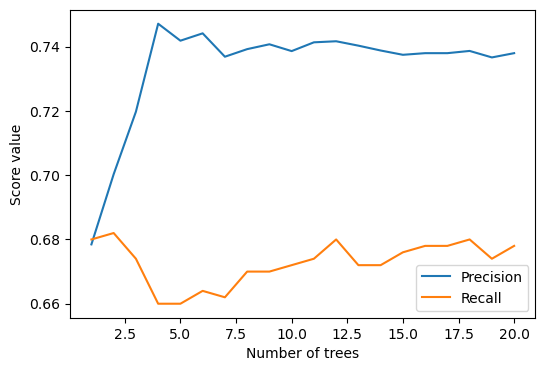

In [53]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.plot(number_trees, precision_scores, label="Precision")
ax.plot(number_trees, recalls_scores, label="Recall")

ax.set_ylabel("Score value")
ax.set_xlabel("Number of trees")
ax.legend()
plt.show()